In [55]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import config

In [56]:
channel_ids = ['UCnz-ZXXER4jOvuED5trXfEA', #techTFQ
            'UCLLw7jmFsvfIVaUFsLs8mlQ', #Luke Barousse
            'UCiT9RITQ9PW6BhXK0y2jaeg', # Ken Jee
            'UC7cs8q-gJRlGwj4A8OmCmXg', # Alex the Analyst
            'UC2UXDak6o7rBm23k3Vv5dww' # Tina Huang
            ]

api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=config.api_key)

## Function to get channel statistics

In [57]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    request = youtube.channels().list(
                part ='snippet,contentDetails,statistics',
                id = ','.join(channel_ids))
    
    response = request.execute()

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads']
                )
        all_data.append(data)

    return all_data

In [58]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [59]:
channel_data = pd.DataFrame(channel_statistics)

In [60]:
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Alex The Analyst,492000,19529584,215,UU7cs8q-gJRlGwj4A8OmCmXg
1,Ken Jee,244000,8137235,276,UUiT9RITQ9PW6BhXK0y2jaeg
2,Luke Barousse,352000,16092121,135,UULLw7jmFsvfIVaUFsLs8mlQ
3,Tina Huang,547000,23699343,124,UU2UXDak6o7rBm23k3Vv5dww
4,techTFQ,205000,10109644,89,UUnz-ZXXER4jOvuED5trXfEA


In [61]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [62]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

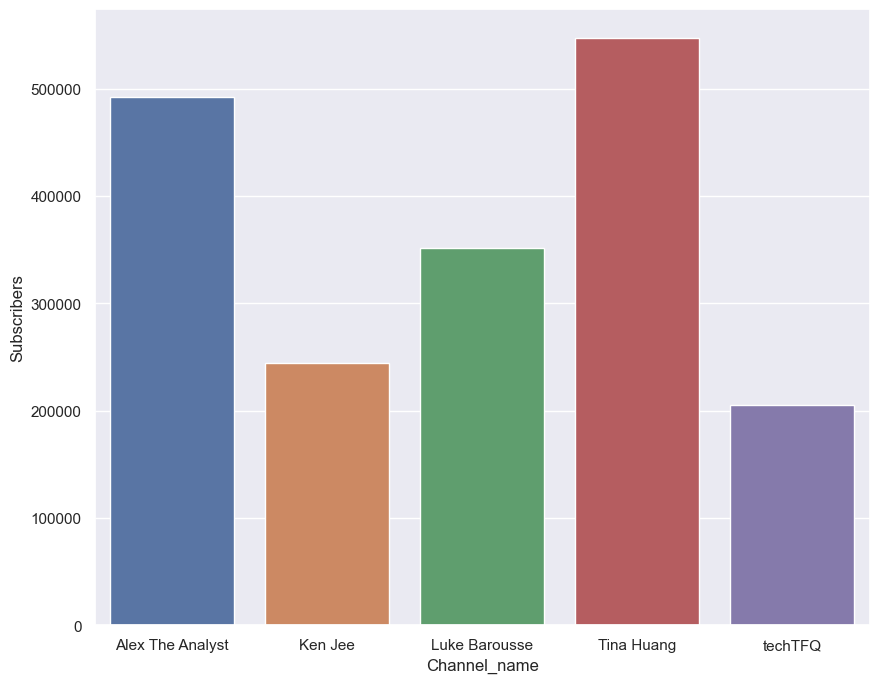

In [63]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Channel_name',y='Subscribers',data=channel_data)

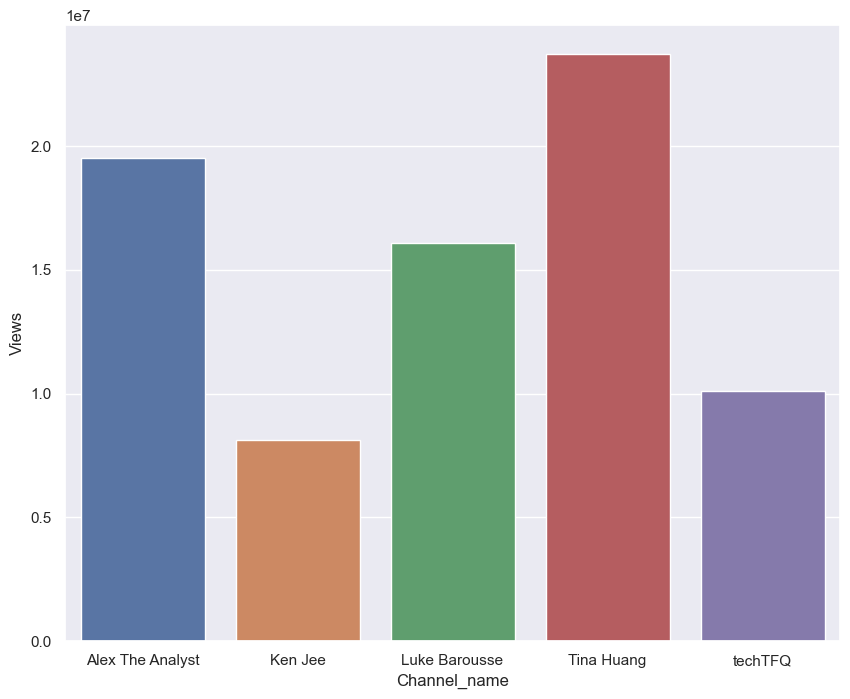

In [64]:
ax = sns.barplot(x='Channel_name',y='Views',data=channel_data)

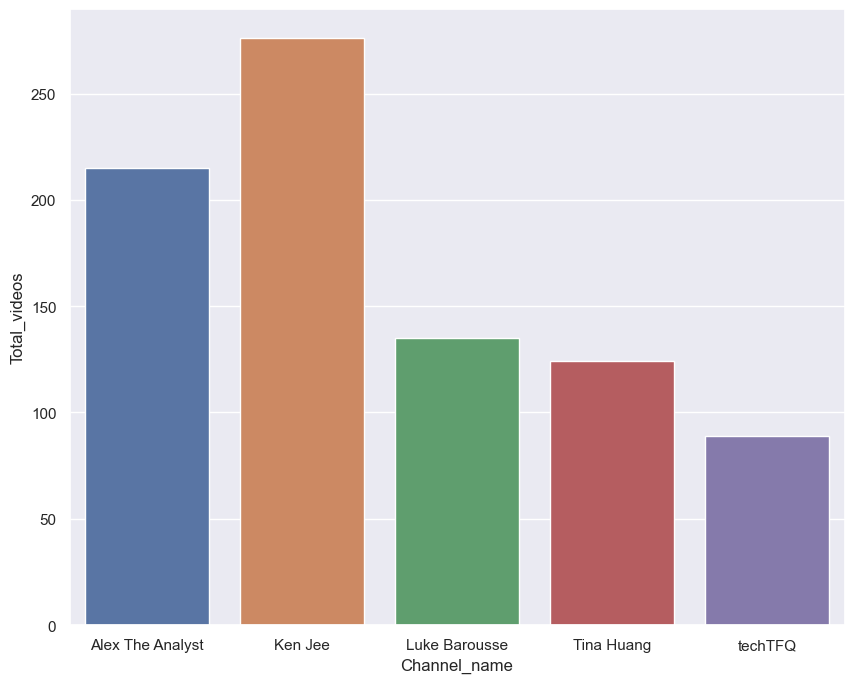

In [65]:
ax = sns.barplot(x='Channel_name',y='Total_videos',data=channel_data)

##  Function to get video ids

In [66]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Ken Jee', 'playlist_id'].iloc[0]

In [71]:
def get_video_ids(youtube, playlist_id):

    request = youtube.playlistItems().list(
                part='contentDetails',
                playlistId = playlist_id,
                maxResults = 50
                )
    
    response = request.execute()

    return response

In [72]:
get_video_ids(youtube, playlist_id)

{'kind': 'youtube#playlistItemListResponse',
 'etag': 'ZssM04UQBSeEzkNAgUFOVfsfHfs',
 'nextPageToken': 'EAAaBlBUOkNBVQ',
 'items': [{'kind': 'youtube#playlistItem',
   'etag': 'DfsthqjoImNJX9fZxGMQhXJ-ylw',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLkhWcGJtdTdyRllF',
   'contentDetails': {'videoId': 'HVpbmu7rFYE',
    'videoPublishedAt': '2023-05-26T12:00:21Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'MqSC-d2PW0ClEI5EFAXVHGAWwdY',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLk5RUTNEUmRYQVhF',
   'contentDetails': {'videoId': 'NQQ3DRdXAXE',
    'videoPublishedAt': '2023-05-16T12:00:25Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'U2EUYUCBCPVGoqaIaR1nRZ6-VwM',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLnhwaS1NMmozTm1F',
   'contentDetails': {'videoId': 'xpi-M2j3NmE',
    'videoPublishedAt': '2023-05-04T12:04:56Z'}},
  {'kind': 'youtube#playlistItem',
   'etag': 'oeB3tZh_GYLh6_zcX2h6tcG9OZ0',
   'id': 'VVVpVDlSSVRROVBXNkJoWEsweTJqYWVnLlgwN3c3UUZvTHBj',
   'contentDetails': {'v